## Start Feature Extraction from the collected Dataset

In [38]:
import os
import pandas as pd
import librosa

import numpy as np
import matplotlib.pyplot as plt

os.chdir('../')

In [39]:
import torch
torch.cuda.is_available()

True

In [40]:
from plot_helper import PlotHelp

In [41]:
file_path = "data//external//processed//"
meta_data = pd.read_csv("data//meta_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data//meta_data.csv'

In [5]:
## if this doesn't hold .. some deep problem we gotta fix my myan
assert all(meta_data.start_time.isna() == meta_data.end_time.isna())

In [6]:
meta_data['label'] = ~meta_data.start_time.isna()
meta_data['label'] = meta_data['label'].astype(int) 

In [7]:
meta_data

,filename,start_time,end_time,label
0,0.wav,NaN,NaN,0
1,1.wav,2060.135706,2768.135706,1
2,2.wav,5898.247361,6653.247361,1
3,3.wav,NaN,NaN,0
4,4.wav,NaN,NaN,0
...,...,...,...,...
1995,1995.wav,NaN,NaN,0
1996,1996.wav,NaN,NaN,0
1997,1997.wav,141.648704,814.648704,1
1998,1998.wav,1940.152564,2683.152564,1


In [8]:
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav,sr = librosa.load(file_path,sr=sr)
    spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,
                hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    return spec_db

def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [9]:
from pydub.playback import play
from pydub import AudioSegment

In [11]:
pos_examples = meta_data[meta_data.label == 1].sample(4)
neg_examples = meta_data[meta_data.label == 0].sample(4)


pos_sound = AudioSegment.from_wav(os.path.join( file_path , pos_examples.sample().filename.item() ))
neg_sound = AudioSegment.from_wav(os.path.join( file_path , neg_examples.sample().filename.item()))

In [13]:
## playing positive example
play( pos_sound )

In [15]:
## playing negative example
play( neg_sound )

In [21]:
for i in pos_examples.iterrows():
    print(type(i[1]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
mel_spec_pos = [ get_melspectrogram_db( os.path.join( file_path , pos_example.filename ) , 44100  )  for _,pos_example in pos_examples.iterrows() ]
mel_spec_neg = [ get_melspectrogram_db( os.path.join( file_path , neg_example.filename ) , 44100  ) for _,neg_example in neg_examples.iterrows() ]

In [29]:
len(mel_spec_pos) , mel_spec_pos[0].shape

(4, (128, 690))

In [32]:
mel_scale_max = 690
time_scale_max = 8000 ## ms

potential_range_in_freq_domain = [  ( mel_scale_max * pos_example.start_time / time_scale_max , 
                                      mel_scale_max * pos_example.end_time / time_scale_max) 
                                      for _,pos_example in pos_examples.iterrows()]

In [33]:
plot_help = PlotHelp( )

TypeError: __init__() missing 2 required positional arguments: 'pos_examples' and 'neg_examples'

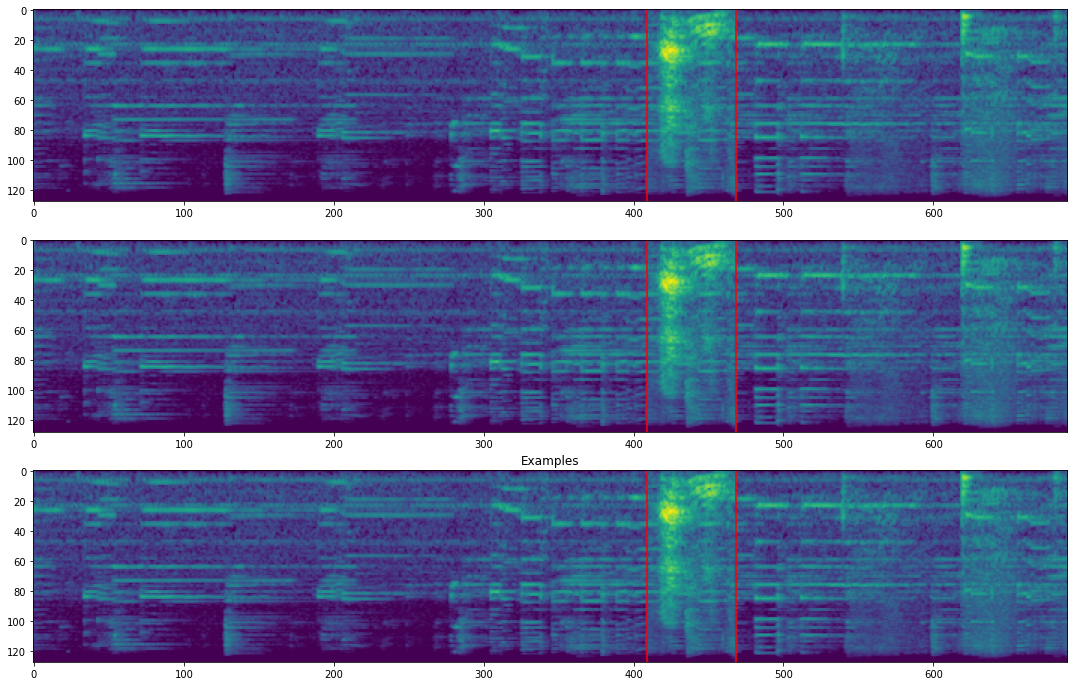

In [153]:
plot_help.plot_examples([mel_spec_pos, mel_spec_pos , mel_spec_pos] , [potential_range_in_freq_domain,potential_range_in_freq_domain,potential_range_in_freq_domain]  )

In [ ]:
fig = plt.figure(figsize=(24, 12))

    plt.subplot(2, 1, 1)
    plt.title( 'Positive example' )
    plt.axvline(potential_range_in_freq_domain[0] , linestyle='dashed' , color = 'red' , linewidth = 2 )
    plt.axvline(potential_range_in_freq_domain[1] , linestyle='dashed' , color = 'red' , linewidth = 2 )
    plt.axvline()
    plt.imshow(mel_spec_pos)

    plt.subplot(2, 1, 2)
    plt.title('negative example')
    plt.imshow(mel_spec_neg)

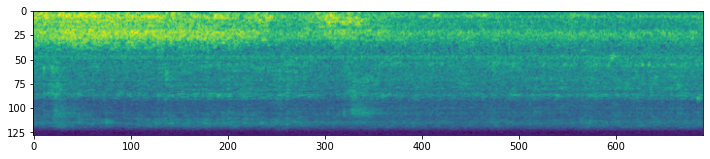

In [10]:
mel_spec_norm = spec_to_image(mel_spec) / 255
plt.figure(figsize=(12, 4))
plt.imshow( mel_spec_norm)

In [12]:
wav,sr = librosa.load(os.path.join( file_path , meta_data.iloc[ 24 , 0 ] ) ,sr=44100)
mfcc_feature = librosa.feature.mfcc( wav , sr)

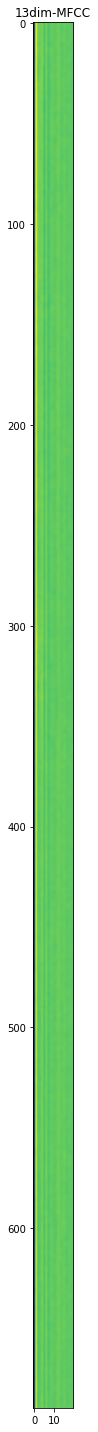

In [24]:
plt.figure(figsize=(4, 20))
plt.imshow(mfcc_feature.T)
plt.title('13dim-MFCC')
plt.tight_layout()

In [2]:
from torch.utils.data import Dataset, DataLoader

ModuleNotFoundError: No module named 'torch'